### titanic SURvival prediction with Ml
This notebook focuses ono the titanic dataset to predict whether a passeger servived or not using various classification  algorithm 


In [1]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)


# TRAINING DATA PRE-PROCESSING
- The first step in the machine learning pipeline is to clean and transform the training data into a useable format for analysis and modeling.


In [12]:
# LOad dataset 
titanic = pd.read_csv("./titanic_dataset.csv")

In [14]:
# Data shape
print('train data:',titanic.shape)

train data: (891, 12)


In [13]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
# Data Info
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Missing Data
- From the entry totals above, there appears to be missing data.

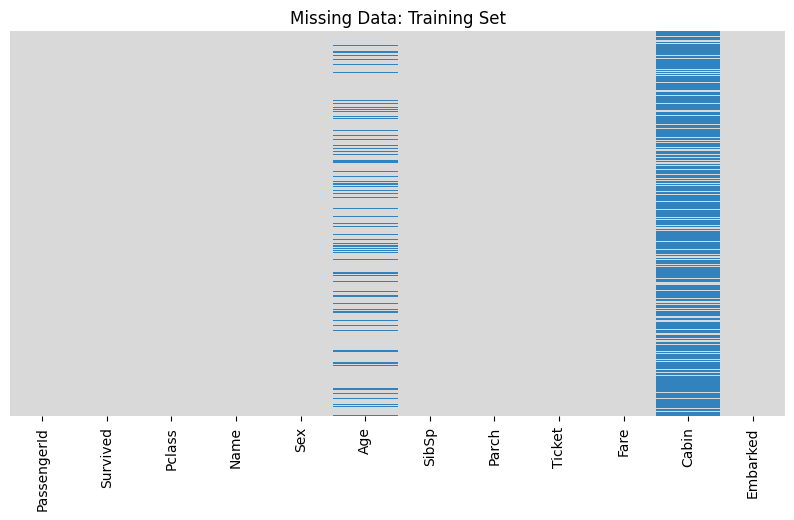

In [17]:
# Heatmap
sns.heatmap(titanic.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

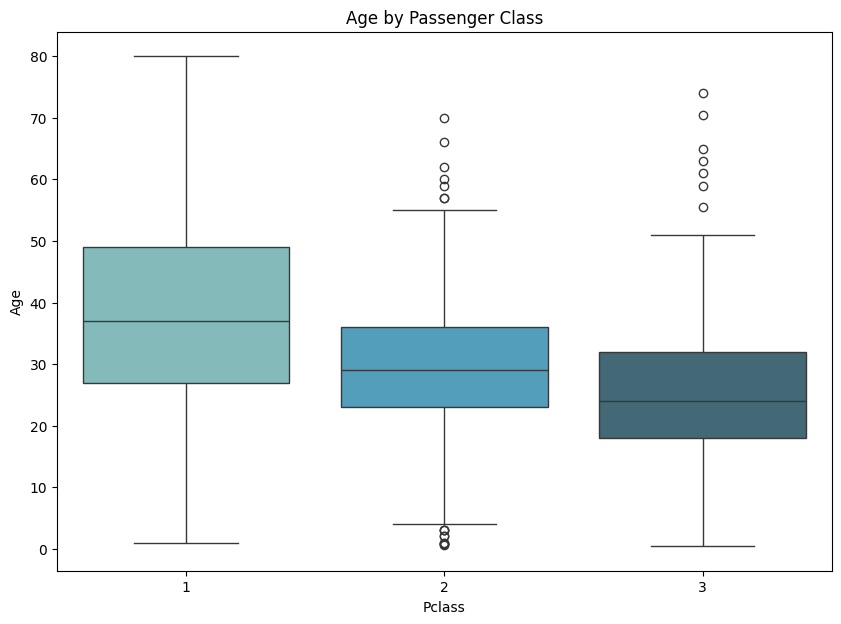

In [18]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic, palette= 'GnBu_d').set_title('Age by Passenger Class')
plt.show()

Naturally, the wealthier passengers in the higher classes tend to be older . We'll use these average age values to impute based on Pclass for Age.

In [19]:
# Imputation function
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:

            return 29

        else:
            return 24

    else:
        return Age

# Apply the function to the Age column
titanic['Age']=titanic[['Age','Pclass']].apply(impute_age, axis =1 )

The Cabin column has too many missing values to do anything useful with, so it would be best to remove it from the data frame altogether.

In [20]:
# Remove Cabin feature
titanic.drop('Cabin', axis = 1, inplace = True)

In [21]:
# Remove rows with missing data
titanic.dropna(inplace = True)

In [24]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [25]:
# Remove unnecessary columns
titanic.drop(['Name','Ticket'], axis = 1, inplace = True)

# Convert objects to category data type
objcat = ['Sex','Embarked']

for colname in objcat:
    titanic[colname] = titanic[colname].astype('category')

In [27]:
# Numeric summary
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,24.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [28]:
# Remove PassengerId
titanic.drop('PassengerId', inplace = True, axis = 1)

# GETTING MODEL READY

In [32]:
# Shape of train data
full_data = titanic

In [34]:
# Shape of train data
full_data.shape

(889, 8)

In [35]:
# Identify categorical features
full_data.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

In [36]:
# Convert categorical variables into 'dummy' or indicator variables
sex = pd.get_dummies(full_data['Sex'], drop_first = True) # drop_first prevents multi-collinearity
embarked = pd.get_dummies(full_data['Embarked'], drop_first = True)

In [37]:
full_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [38]:
# Add new dummy columns to data frame
full_data = pd.concat([full_data, sex, embarked], axis = 1)
full_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,True,False,True
1,1,1,female,38.0,1,0,71.2833,C,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,True,False,True


In [39]:
# Drop unecessary columns
full_data.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

# Shape of train data
print('train_data shape',full_data.shape)

# Confirm changes
full_data.head()

train_data shape (889, 9)


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


# OBJECTIVE 2: MACHINE LEARNING
- Next, I will feed these features into various classification algorithms to determine the best performance using a simple framework: Split, Fit, Predict, Score It.

In [40]:
# Split data to be used in the models
# Create matrix of features
x = full_data.drop('Survived', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = full_data['Survived'] # y is the column we're trying to predict

In [41]:
x # x Represents the Features
x.shape

(889, 8)

In [42]:
y # y represents the Target
y.shape

(889,)

In [43]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

In [44]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)

In [45]:
x_train.shape
x_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
307,1,17.0,1,0,108.9000,False,False,False
229,3,24.0,3,1,25.4667,False,False,True
82,3,24.0,0,0,7.7875,False,True,False
353,3,25.0,1,0,17.8000,True,False,True
707,1,42.0,0,0,26.2875,True,False,True
...,...,...,...,...,...,...,...,...
576,2,34.0,0,0,13.0000,False,False,True
840,3,20.0,0,0,7.9250,True,False,True
338,3,45.0,0,0,8.0500,True,False,True
524,3,24.0,0,0,7.2292,True,False,False


In [46]:
# y_train.shape
y_train

307    1
229    0
82     1
353    0
707    1
      ..
576    1
840    0
338    1
524    0
865    1
Name: Survived, Length: 711, dtype: int64

In [47]:
x_test.shape
x_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
511,3,24.0,0,0,8.0500,True,False,True
613,3,24.0,0,0,7.7500,True,True,False
615,2,24.0,1,2,65.0000,False,False,True
337,1,41.0,0,0,134.5000,False,False,False
718,3,24.0,0,0,15.5000,True,True,False
...,...,...,...,...,...,...,...,...
155,1,51.0,0,1,61.3792,True,False,False
450,2,36.0,1,2,27.7500,True,False,True
756,3,28.0,0,0,7.7958,True,False,True
187,1,45.0,0,0,26.5500,True,False,True


 # LOGISTIC REGRESSION

In [48]:
# Model Training
# Import model
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
# Create instance of model
log_reg = LogisticRegression()

# Pass training data into model
log_reg.fit(x_train, y_train)

Logistic Regression


LogisticRegression()

# Model Evaluation
- Logistic regression

In [49]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_log_reg = log_reg.predict(x_test)
# Score It

print('Logistic Regression')
# Accuracy
print('--'*30)
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg) * 100,2)
print('Accuracy', log_reg_accuracy,'%')

Logistic Regression
------------------------------------------------------------
Accuracy 82.02 %


# Decision Tree
- Model Training

In [50]:
from sklearn.tree import DecisionTreeClassifier

print('Decision Tree Classifier')
# Create instance of model
Dtree = DecisionTreeClassifier()

# Pass training data into model
Dtree.fit(x_train, y_train)


Decision Tree Classifier


DecisionTreeClassifier()

# Model Evalution
- Decision Tree Classifier

In [51]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_Dtree = Dtree.predict(x_test)
# Score It

print('Decision Tree Classifier')
# Accuracy
print('--'*30)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)
print('Accuracy', Dtree_accuracy,'%')

Decision Tree Classifier
------------------------------------------------------------
Accuracy 79.21 %


# Random Forest
- Model Training

In [52]:
from sklearn.ensemble import RandomForestClassifier

print('Random Forest Classifier')
# Create instance of model
rfc = RandomForestClassifier()

# Pass training data into model
rfc.fit(x_train, y_train)

Random Forest Classifier


RandomForestClassifier()

### Model Evaluation
- Random Forest

In [53]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_rfc = rfc.predict(x_test)
# Score It

print('Random Forest Classifier')
# Accuracy
print('--'*30)
rfc_accuracy = round(accuracy_score(y_test, y_pred_rfc) * 100,2)
print('Accuracy', rfc_accuracy,'%')

Random Forest Classifier
------------------------------------------------------------
Accuracy 82.02 %


### Gradient Bossting Classifier
- Model Training

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

print('Gradient Boosting Classifier')
# Create instance of model
gbc = GradientBoostingClassifier()

# Pass training data into model
gbc.fit(x_train, y_train)

Gradient Boosting Classifier


GradientBoostingClassifier()

# Model Evalution
- Gradient Boosting

In [55]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_gbc = gbc.predict(x_test)
# Score It

print('Gradient Boosting Classifier')
# Accuracy
print('--'*30)
gbc_accuracy = round(accuracy_score(y_test, y_pred_gbc) * 100,2)
print('Accuracy', gbc_accuracy,'%')

Gradient Boosting Classifier
------------------------------------------------------------
Accuracy 84.27 %


In [56]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Logistic Regression": log_reg_accuracy,
    "Decision Tree Classifier": Dtree_accuracy,
    "Random Forest Classifier": rfc_accuracy,
    "Gradient Boosting Classifier": gbc_accuracy
}

# Sort the model scores in descending order based on their values (higher values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Display the ranking of the models
print("Model Rankings (Greater Values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

Model Rankings (Greater Values are better):
1. Gradient Boosting Classifier: 84.27
2. Logistic Regression: 82.02
3. Random Forest Classifier: 82.02
4. Decision Tree Classifier: 79.21
